In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
pd.options.display.max_rows = 50
## Install xlrd package to load Excel files
# conda install openpyxl
## conda install xlrd
from numpy import asarray
from sklearn.preprocessing import OneHotEncoder

In [2]:
RAND_STATE = 34 # for reproducible shuffling
TT_RATIO = 0.3 # test/train

In [3]:
#Load the dataframe into a variable
df = pd.read_csv('Data/Data_Marketing_Customer_Analysis_Round3.csv')
df.columns

Index(['region', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'month', 'employment_status',
       'gender', 'income', 'location_code', 'marital_status',
       'monthly_premium_auto', 'months_since_last_claim',
       'months_since_policy_inception', 'number_of_open_complaints',
       'number_of_policies', 'policy_type', 'policy', 'renew_offer_type',
       'sales_channel', 'total_claim_amount', 'vehicle_class', 'vehicle_size'],
      dtype='object')

## Correlation Heatmap

In [4]:
corr = df.corr()

<AxesSubplot:>

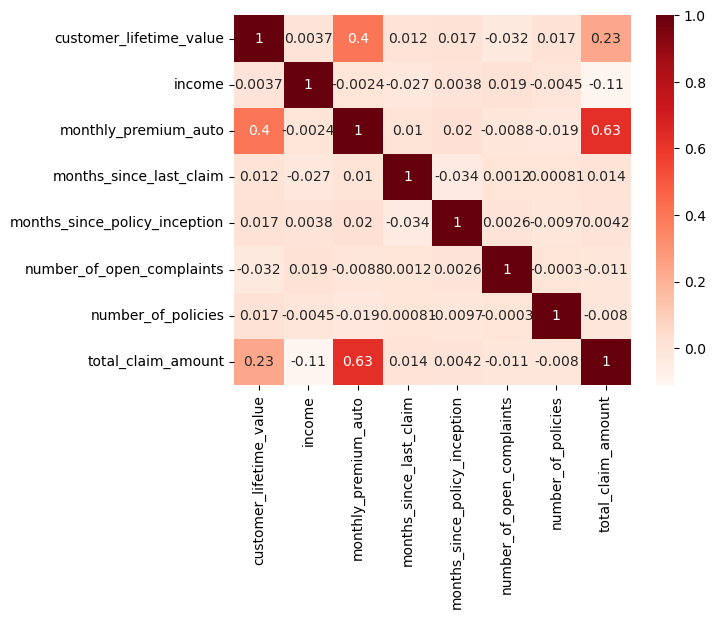

In [5]:
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, 
        annot=True, cmap='Reds')

## X/Y Split

In [6]:
X = df.drop('total_claim_amount', axis=1)
y = df['total_claim_amount']

## Numerical/Categorical Split

In [7]:
numericalX = X.select_dtypes(np.number)
categoricalX = X.select_dtypes(np.object)

C:\Users\kurtu\AppData\Local\Temp\ipykernel_4204\2358487290.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categoricalX = X.select_dtypes(np.object)


In [8]:
numericalX.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies'],
      dtype='object')

 ## Test/Train Split

In [9]:
# test-train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TT_RATIO, random_state=RAND_STATE)
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
X_train.head(3)

,region,customer_lifetime_value,response,coverage,education,effective_to_date,month,employment_status,gender,income,...,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
2705,central,4786,no,basic,college,1/2/11,jan,employed,m,45515,...,10,33,0,9,personal auto,personal l3,offer2,call center,four-door car,medsize
2209,central,22445,no,basic,bachelor,2/28/11,feb,unemployed,f,80340,...,32,35,0,2,personal auto,personal l2,offer1,call center,four-door car,medsize
4004,west region,6412,no,extended,bachelor,1/2/11,jan,employed,m,58776,...,20,50,2,4,personal auto,personal l3,offer3,branch,four-door car,medsize


## Standardization

In [10]:
pt = PowerTransformer()

In [11]:
ct = ColumnTransformer([("pt", pt, list(numericalX.columns))],
                        remainder='drop',verbose_feature_names_out=True,verbose=True).fit(X_train)
X_train_ct = pd.DataFrame(ct.transform(X_train),columns=ct.get_feature_names_out())
X_test_ct = pd.DataFrame(ct.transform(X_test),columns=ct.get_feature_names_out())

[ColumnTransformer] ............ (1 of 1) Processing pt, total=   0.1s


In [12]:
eqution = 'y~pt__customer_lifetime_value+pt__income+pt__monthly_premium_auto+pt__months_since_last_claim+pt__months_since_policy_inception+pt__number_of_open_complaints+pt__number_of_policies'

In [13]:
X_train = pd.DataFrame(X_train_ct)
X_test_ct

,pt__customer_lifetime_value,pt__income,pt__monthly_premium_auto,pt__months_since_last_claim,pt__months_since_policy_inception,pt__number_of_open_complaints,pt__number_of_policies
0,0.649823,-0.633250,0.960690,0.582646,-0.033143,-0.502522,1.660057
1,-0.499110,0.552571,0.915092,0.415591,0.588851,-0.502522,-1.143833
2,-0.477937,0.364965,0.891527,-0.830609,0.557616,-0.502522,-1.143833
3,-0.664449,-1.480107,-1.453068,0.971550,1.070851,1.947236,0.513168
4,1.825591,-1.264602,-0.643882,0.971550,-0.428756,-0.502522,-0.063268
...,...,...,...,...,...,...,...
3202,0.510696,0.842343,-0.932776,-0.968850,0.103386,-0.502522,-0.063268
3203,0.543247,-0.936795,-0.513634,0.055807,-0.244875,-0.502522,-0.063268
3204,0.309956,1.331340,0.241171,1.328120,1.329338,-0.502522,1.311711
3205,-1.338693,0.817804,-0.513634,-0.243334,1.012270,2.046916,-1.143833


## OLS Modelling

In [14]:
from statsmodels.formula.api import ols

In [15]:
X_train_const_ct = sm.add_constant(X_train_ct.to_numpy()) # adding a constant

model = sm.OLS(y_train, X_train_const_ct).fit()
predictions_train = model.predict(X_train_const_ct)

X_test_const_ct = sm.add_constant(X_test_ct) # adding a constant
predictions_test = model.predict(X_test_const_ct)
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:     total_claim_amount   R-squared:                       0.315
Model:                            OLS   Adj. R-squared:                  0.314
Method:                 Least Squares   F-statistic:                     490.3
Date:                Thu, 02 Feb 2023   Prob (F-statistic):               0.00
Time:                        16:50:09   Log-Likelihood:                -51659.
No. Observations:                7482   AIC:                         1.033e+05
Df Residuals:                    7474   BIC:                         1.034e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        435.8295      2.790    156.232      0.0

There is a significant relationship between dependent variable which is Total Claim Amount and two independent variables which are Income(t=-11.917, p<0.05) and Monthly premium auto(t=48.426, p<0.05).

In [16]:
#smodel=ols(formula=eqution,data=X_train_const_ct).fit()
#smodel.summary()

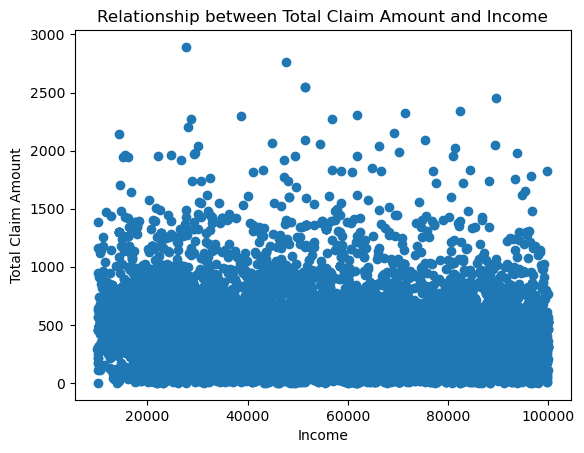

In [17]:
plt.scatter(numericalX['income'], y)
plt.title('Relationship between Total Claim Amount and Income')
plt.xlabel('Income')
plt.ylabel('Total Claim Amount')
plt.show()

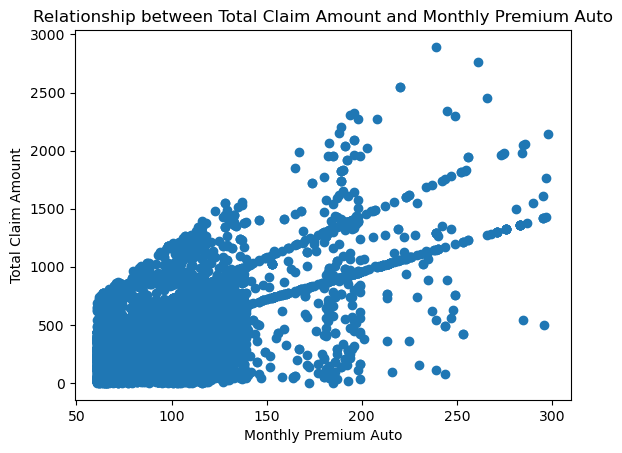

In [18]:
plt.scatter(numericalX['monthly_premium_auto'], y)
plt.title('Relationship between Total Claim Amount and Monthly Premium Auto')
plt.xlabel('Monthly Premium Auto')
plt.ylabel('Total Claim Amount')
plt.show()

In [19]:
model=LinearRegression()    # model
model.fit(X_train_ct, y_train)   # model train

LinearRegression()

In [20]:
model.coef_

array([ -0.44731571, -33.2628964 , 160.19471155,   3.25267606,
         1.10130638,  -2.35453312,  -1.30344579])

In [21]:
model.intercept_

435.8294573643475

In [22]:
y_pred = pd.DataFrame(model.predict(X_test_ct),columns = ['target_d'] )      # model prediction
y_pred_train =  pd.DataFrame(model.predict(X_train_ct),columns = ['target_d'])

## Model Performance & Error Evaluation

In [23]:
print(mse(y_test,predictions_test))
print(mae(y_test,predictions_test))
##prediction on the train set
print(mse(y_train,predictions_train))

60886.7009574536
170.37062119114876
58162.78606316329


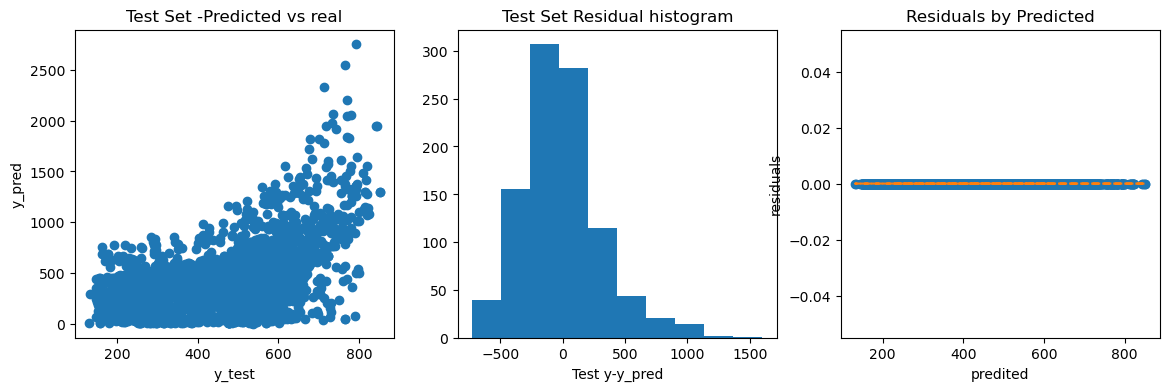

In [24]:
# Make an scatter plot y_pred vs y
# What kind of plot you will get if all the all the predictions are ok?
# A stright line

fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(predictions_test, y_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[1].hist(y_test - predictions_test)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(predictions_test,predictions_test.to_numpy()-predictions_test.to_numpy(),"o")
ax[2].set_xlabel("predited")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(predictions_test,np.zeros(len(predictions_test)),linestyle='dashed')

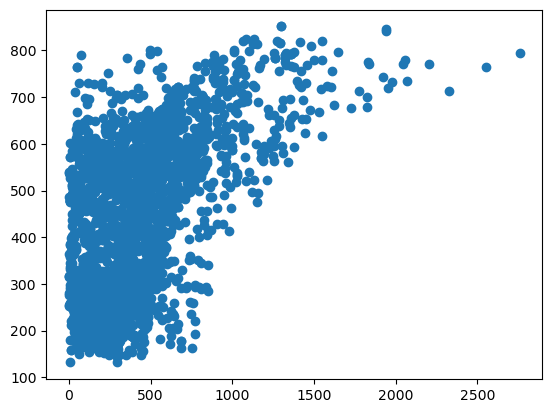

In [25]:
plt.scatter(y_test, predictions_test)
plt.show()

In [26]:
result=pd.DataFrame({"y_test": list(y_test),"y_pred": list(predictions_test)})

<AxesSubplot:xlabel='y_test', ylabel='y_pred'>

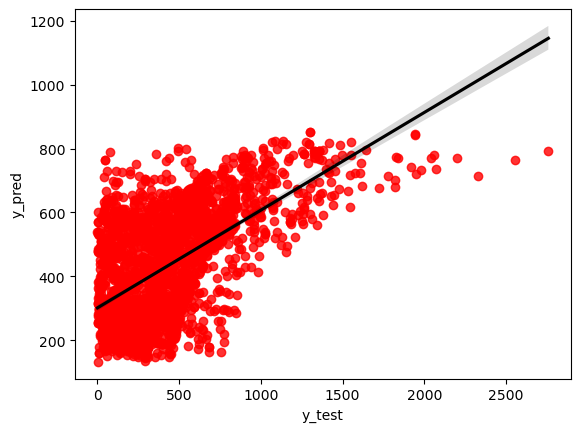

In [27]:
sns.regplot(x='y_test',y='y_pred', data=result, scatter_kws={"color": "red"}, line_kws={"color": "black"})

## Feature Importances

In [28]:
features_importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': abs(model.coef_.reshape(len(X_train.columns),))
})
features_importances = features_importances.sort_values(by='Importance', ascending=False)
features_importances

,Attribute,Importance
2,pt__monthly_premium_auto,160.194712
1,pt__income,33.262896
3,pt__months_since_last_claim,3.252676
5,pt__number_of_open_complaints,2.354533
6,pt__number_of_policies,1.303446
4,pt__months_since_policy_inception,1.101306
0,pt__customer_lifetime_value,0.447316


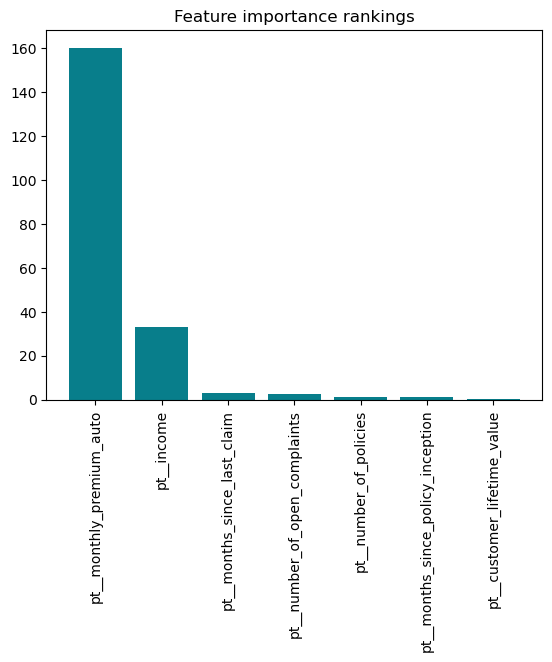

In [29]:
plt.bar(x=features_importances['Attribute'].iloc[:10], height=features_importances['Importance'].iloc[:10], color='#087E8B')
plt.title('Feature importance rankings', size=12)
plt.xticks(rotation='vertical')
plt.show()

## One-Hot Encoding for categorical variables

In [30]:
df

,region,customer_lifetime_value,response,coverage,education,effective_to_date,month,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,central,4809,no,basic,college,2/18/11,feb,employed,m,48029,...,52,0,9,corporate auto,corporate l3,offer3,agent,292,four-door car,medsize
1,west region,2228,no,basic,college,1/18/11,jan,unemployed,f,92260,...,26,0,1,personal auto,personal l3,offer4,call center,744,four-door car,medsize
2,east,14947,no,basic,bachelor,2/10/11,feb,employed,m,22139,...,31,0,2,personal auto,personal l3,offer3,call center,480,suv,medsize
3,north west,22332,yes,extended,college,1/11/11,jan,employed,m,49078,...,3,0,2,corporate auto,corporate l3,offer2,branch,484,four-door car,medsize
4,north west,9025,no,premium,bachelor,1/17/11,jan,medical leave,f,23675,...,31,0,7,personal auto,personal l2,offer1,branch,707,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,15563,no,premium,bachelor,1/19/11,jan,unemployed,f,61541,...,40,0,7,personal auto,personal l1,offer3,web,1214,luxury car,medsize
10685,north west,5259,no,basic,college,1/6/11,jan,employed,f,61146,...,68,0,6,personal auto,personal l3,offer2,branch,273,four-door car,medsize
10686,central,23893,no,extended,bachelor,2/6/11,feb,employed,f,39837,...,63,0,2,corporate auto,corporate l3,offer1,web,381,luxury suv,medsize
10687,west region,11971,no,premium,college,2/13/11,feb,employed,f,64195,...,27,4,6,personal auto,personal l1,offer1,branch,618,suv,medsize


In [31]:
df = df.drop('effective_to_date', axis=1)

In [32]:
#education
ed_map = {"high school or below": 0, "college":1, "bachelor": 1,"master":2, "doctor":3}
ed_map
df['education'] = df['education'].map(ed_map)

In [33]:
df['vehicle_size'].unique()

array(['medsize', 'small', 'large'], dtype=object)

In [34]:
#employment
ep_map = {"unemployed": 0, "employed":1, 'medical leave':2,'disabled':3, 'retired':4 }
ep_map
df['employment_status'] = df['employment_status'].map(ep_map)

In [35]:
#region
rg_map = {'central':0, 'west region':1, 'east':2, 'north west':3 }
rg_map
df['region'] = df['region'].map(rg_map)

In [36]:
#response
rp_map = {'no':0, 'yes':1}
rp_map
df['response'] = df['response'].map(rp_map)

In [37]:
#sales channel
sc_map = {'agent':0, 'call center':1, 'branch':2, 'web':3}
sc_map
df['sales_channel'] = df['sales_channel'].map(sc_map)

In [38]:
#vehicle_class
vc_map = {'four-door car':0, 'suv':1, 'two-door car':2, 'sports car':3, 'luxury car':4,
       'luxury suv':5}
vc_map
df['vehicle_class'] = df['vehicle_class'].map(vc_map)

In [39]:
#vehicle_size
vs_map = {'medsize':0, 'small':1, 'large':2}
vs_map
df['vehicle_size'] = df['vehicle_size'].map(vs_map)

In [40]:
#vehicle_size
vs_map = {'medsize':0, 'small':1, 'large':2}
vs_map
df['vehicle_size'] = df['vehicle_size'].map(vs_map)

In [41]:
df_dummies = pd.get_dummies(df['gender'], sparse=1,drop_first=1)

In [42]:
df

,region,customer_lifetime_value,response,coverage,education,month,employment_status,gender,income,location_code,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,0,4809,0,basic,1,feb,1,m,48029,suburban,...,52,0,9,corporate auto,corporate l3,offer3,0,292,0,NaN
1,1,2228,0,basic,1,jan,0,f,92260,suburban,...,26,0,1,personal auto,personal l3,offer4,1,744,0,NaN
2,2,14947,0,basic,1,feb,1,m,22139,suburban,...,31,0,2,personal auto,personal l3,offer3,1,480,1,NaN
3,3,22332,1,extended,1,jan,1,m,49078,suburban,...,3,0,2,corporate auto,corporate l3,offer2,2,484,0,NaN
4,3,9025,0,premium,1,jan,2,f,23675,suburban,...,31,0,7,personal auto,personal l2,offer1,2,707,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,0,15563,0,premium,1,jan,0,f,61541,suburban,...,40,0,7,personal auto,personal l1,offer3,3,1214,4,NaN
10685,3,5259,0,basic,1,jan,1,f,61146,urban,...,68,0,6,personal auto,personal l3,offer2,2,273,0,NaN
10686,0,23893,0,extended,1,feb,1,f,39837,rural,...,63,0,2,corporate auto,corporate l3,offer1,3,381,5,NaN
10687,1,11971,0,premium,1,feb,1,f,64195,urban,...,27,4,6,personal auto,personal l1,offer1,2,618,1,NaN


In [47]:
X = df.drop(['total_claim_amount', 'coverage','month','gender', 'policy_type', 'policy', 'renew_offer_type'], axis=1)
y = df['total_claim_amount']

In [48]:
# test-train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TT_RATIO, random_state=RAND_STATE)
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
X_train.head(3)

,region,customer_lifetime_value,response,education,employment_status,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,sales_channel,vehicle_class,vehicle_size
2705,0,4786,0,1,1,45515,urban,married,61,10,33,0,9,1,0,NaN
2209,0,22445,0,1,0,80340,suburban,single,71,32,35,0,2,1,0,NaN
4004,1,6412,0,1,1,58776,suburban,divorced,83,20,50,2,4,2,0,NaN


In [49]:

X_train_ct = pd.DataFrame(ct.transform(X_train),columns=ct.get_feature_names_out())
X_test_ct = pd.DataFrame(ct.transform(X_test),columns=ct.get_feature_names_out())

In [50]:
X_train = pd.DataFrame(X_train_ct)
X_test_ct

,pt__customer_lifetime_value,pt__income,pt__monthly_premium_auto,pt__months_since_last_claim,pt__months_since_policy_inception,pt__number_of_open_complaints,pt__number_of_policies
0,0.649823,-0.633250,0.960690,0.582646,-0.033143,-0.502522,1.660057
1,-0.499110,0.552571,0.915092,0.415591,0.588851,-0.502522,-1.143833
2,-0.477937,0.364965,0.891527,-0.830609,0.557616,-0.502522,-1.143833
3,-0.664449,-1.480107,-1.453068,0.971550,1.070851,1.947236,0.513168
4,1.825591,-1.264602,-0.643882,0.971550,-0.428756,-0.502522,-0.063268
...,...,...,...,...,...,...,...
3202,0.510696,0.842343,-0.932776,-0.968850,0.103386,-0.502522,-0.063268
3203,0.543247,-0.936795,-0.513634,0.055807,-0.244875,-0.502522,-0.063268
3204,0.309956,1.331340,0.241171,1.328120,1.329338,-0.502522,1.311711
3205,-1.338693,0.817804,-0.513634,-0.243334,1.012270,2.046916,-1.143833


In [51]:
from statsmodels.formula.api import ols

In [52]:
X_train_const_ct = sm.add_constant(X_train_ct.to_numpy()) # adding a constant

model = sm.OLS(y_train, X_train_const_ct).fit()
predictions_train = model.predict(X_train_const_ct)

X_test_const_ct = sm.add_constant(X_test_ct) # adding a constant
predictions_test = model.predict(X_test_const_ct)
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:     total_claim_amount   R-squared:                       0.315
Model:                            OLS   Adj. R-squared:                  0.314
Method:                 Least Squares   F-statistic:                     490.3
Date:                Mon, 20 Feb 2023   Prob (F-statistic):               0.00
Time:                        14:42:25   Log-Likelihood:                -51659.
No. Observations:                7482   AIC:                         1.033e+05
Df Residuals:                    7474   BIC:                         1.034e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        435.8295      2.790    156.232      0.0

In [53]:
model=LinearRegression()    # model
model.fit(X_train_ct, y_train)   # model train

LinearRegression()

In [54]:
model.coef_

array([ -0.44731571, -33.2628964 , 160.19471155,   3.25267606,
         1.10130638,  -2.35453312,  -1.30344579])

In [55]:
model.intercept_

435.8294573643475

In [56]:
y_pred = pd.DataFrame(model.predict(X_test_ct),columns = ['target_d'] )      # model prediction
y_pred_train =  pd.DataFrame(model.predict(X_train_ct),columns = ['target_d'])

In [57]:
print(mse(y_test,predictions_test))
print(mae(y_test,predictions_test))
##prediction on the train set
print(mse(y_train,predictions_train))

60886.7009574536
170.37062119114876
58162.78606316329


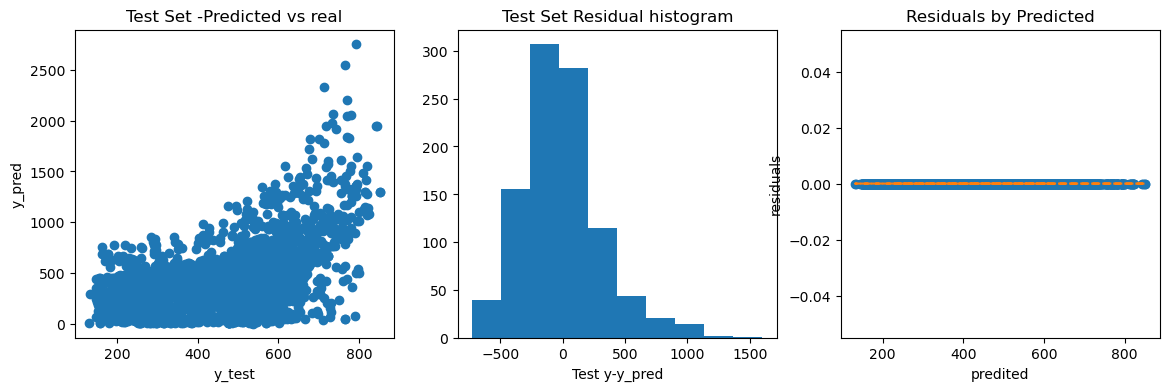

In [58]:
# Make an scatter plot y_pred vs y
# What kind of plot you will get if all the all the predictions are ok?
# A stright line

fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(predictions_test, y_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[1].hist(y_test - predictions_test)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(predictions_test,predictions_test.to_numpy()-predictions_test.to_numpy(),"o")
ax[2].set_xlabel("predited")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(predictions_test,np.zeros(len(predictions_test)),linestyle='dashed')

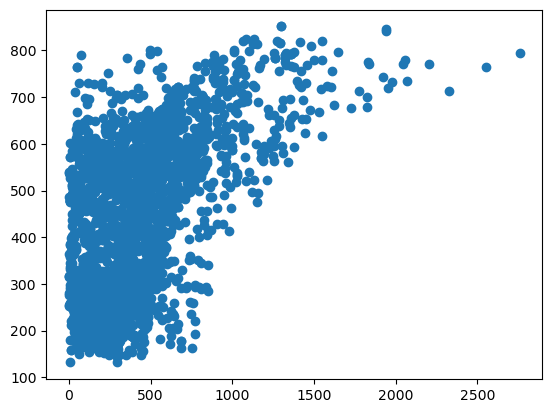

In [59]:
plt.scatter(y_test, predictions_test)
plt.show()

In [60]:
result=pd.DataFrame({"y_test": list(y_test),"y_pred": list(predictions_test)})

## Feature Importances

In [61]:
features_importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': abs(model.coef_.reshape(len(X_train.columns),))
})
features_importances = features_importances.sort_values(by='Importance', ascending=False)
features_importances

,Attribute,Importance
2,pt__monthly_premium_auto,160.194712
1,pt__income,33.262896
3,pt__months_since_last_claim,3.252676
5,pt__number_of_open_complaints,2.354533
6,pt__number_of_policies,1.303446
4,pt__months_since_policy_inception,1.101306
0,pt__customer_lifetime_value,0.447316


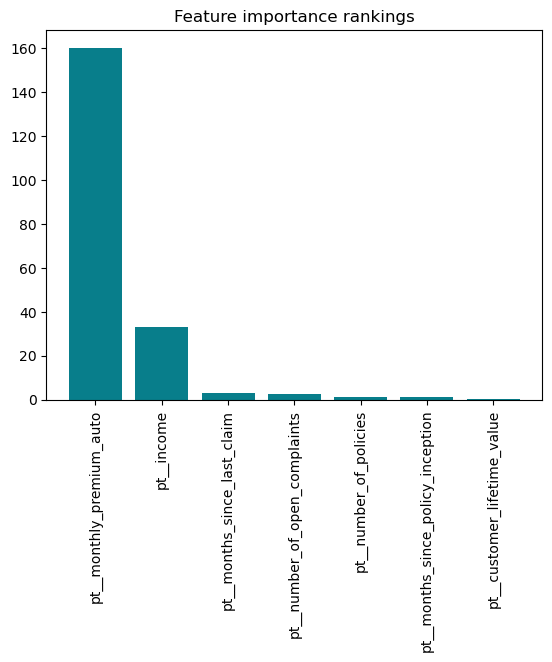

In [62]:
plt.bar(x=features_importances['Attribute'].iloc[:10], height=features_importances['Importance'].iloc[:10], color='#087E8B')
plt.title('Feature importance rankings', size=12)
plt.xticks(rotation='vertical')
plt.show()

# Recursive feature elimination

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE  ## recursive feature elemination technique

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

X_train = X_train.select_dtypes(include=np.number)
X_test  = X_test.select_dtypes(include=np.number)

X_train = pd.DataFrame(X_train, columns=X.columns)
X_test  = pd.DataFrame(X_test, columns=X.columns)

#X_train.isna().sum()
nulls = pd.DataFrame(X_train.isna().sum()).reset_index()
#nulls.head()
nulls.columns = ['Column','nas']
#nulls.head()
#nulls[nulls['nas'] > 0].head()
cols_to_drop = nulls[nulls['nas'] > 0]['Column'] # Too drastic, but made on pourpose for quick filtering (don't do this in production!!)

X_train.drop(columns=cols_to_drop, axis=1, inplace = True)
X_test.drop(columns=cols_to_drop, axis=1, inplace = True)

#display(X_train)

lm = LinearRegression()

selector = RFE(lm, n_features_to_select= 8, step = 1, verbose = 1) # Step is how many features to add or drop everytime
selector.fit(X_train, y_train)

kept_features = selector.get_support(indices = True) #returns an array of integers corresponding to nonremoved features
kept_features = list(X_train.iloc[:,kept_features].columns)

X_train = selector.transform(X_train)
X_test  = selector.transform(X_test)

X_train = pd.DataFrame(X_train, columns=kept_features)
X_test  = pd.DataFrame(X_test, columns=kept_features)

print("Final selected features: ")
display(X_train)

Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Final selected features: 


,response,education,employment_status,monthly_premium_auto,months_since_last_claim,number_of_policies,sales_channel,vehicle_class
0,1,1,0,65,9,2,0,2
1,0,0,1,106,5,6,1,2
2,0,1,1,101,3,1,0,1
3,0,1,1,63,3,2,0,0
4,0,1,1,115,1,2,3,1
...,...,...,...,...,...,...,...,...
8546,0,1,1,94,22,3,2,0
8547,0,1,1,98,17,2,0,2
8548,0,2,2,64,26,8,0,0
8549,0,0,1,106,23,2,2,1


In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

X_train = X_train.select_dtypes(include=np.number)
X_test  = X_test.select_dtypes(include=np.number)

In [65]:
import numpy as np
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
X_train=imp_mean.fit_transform(X_train)
X_test = imp_mean.fit_transform(X_test)

In [67]:
model=LinearRegression()
model.fit(X_train, y_train)
print(f"{model.__class__.__name__}: Train -> {model.score(X_train, y_train)}, Test -> {model.score(X_test, y_test)}")

LinearRegression: Train -> 0.454618860371401, Test -> 0.459770738471474


In [68]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet, LinearRegression
model=Lasso(alpha=0.05)

model.fit(X_train, y_train)
print(f"{model.__class__.__name__}: Train -> {model.score(X_train, y_train)}, Test -> {model.score(X_test, y_test)}")

Lasso: Train -> 0.45461829644371854, Test -> 0.4598225717193204


In [69]:
model=Ridge(alpha=10000)
model.fit(X_train, y_train)
print(f"{model.__class__.__name__}: Train -> {model.score(X_train, y_train)}, Test -> {model.score(X_test, y_test)}")

Ridge: Train -> 0.43197989586767815, Test -> 0.4369638370407358


In [70]:
model=ElasticNet(alpha=0.1)
model.fit(X_train, y_train)
print(f"{model.__class__.__name__}: Train -> {model.score(X_train, y_train)}, Test -> {model.score(X_test, y_test)}")

ElasticNet: Train -> 0.4540508357222123, Test -> 0.46003405255636076
